# 소스코드 통합예정

<center><b>Import Libraries<b/><center>

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join
from os import getcwd

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

<center><b>Loading Data</b></center>

In [31]:
# set path
cur_path = getcwd()
data_path = join(cur_path,'data')
static_path = join(cur_path,'static') # path for result images

# load
df_test = pd.read_csv(join(data_path,'test.csv'))
df_train = pd.read_csv(join(data_path,'train.csv'))
data = [df_test,df_train]

# 확인용, 나중에 지움
print('[current Absolute Path]\t{}'.format(cur_path))
print('[data folder Absolute Path]\t {}'.format(data_path))
print('[image folder Absolute Path]\t {}'.format(static_path))

[current Absolute Path]	c:\Users\kdh\Desktop\projects\project_mini_ml_team_two
[data folder Absolute Path]	 c:\Users\kdh\Desktop\projects\project_mini_ml_team_two\data
[image folder Absolute Path]	 c:\Users\kdh\Desktop\projects\project_mini_ml_team_two\static


In [32]:
df = pd.concat(data,ignore_index=True)
df.shape

(421570, 16)

In [33]:
df.head(3)

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Weekly_Sales
0,28,40,2012-01-06,False,50.43,3.599,5155.86,19549.51,218.29,636.73,5218.50,130.157516,12.187,A,206302,NaN
1,18,93,2012-03-09,False,38.10,3.876,7410.18,368.19,25.46,1852.39,2332.07,137.506690,8.075,B,120653,NaN
2,38,4,2011-05-27,False,76.67,4.087,NaN,NaN,NaN,NaN,NaN,129.062355,13.736,C,39690,NaN


In [34]:
df.tail(3)

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Weekly_Sales
421567,14,29,2010-04-30,False,53.15,2.921,NaN,NaN,NaN,NaN,NaN,181.662036,8.899,A,200898,10939.87
421568,15,90,2011-07-01,False,67.43,3.916,NaN,NaN,NaN,NaN,NaN,135.446800,7.806,B,123737,5013.89
421569,13,32,2011-10-14,False,51.74,3.567,NaN,NaN,NaN,NaN,NaN,129.770645,6.392,A,219622,8103.12


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000
MarkDown5,151432.0,4628.975079,5962.887455,135.160,1878.440000,3359.45000,5563.800000,108519.280000
CPI,421570.0,171.201947,39.159276,126.064,132.022667,182.31878,212.416993,227.232807


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   IsHoliday     421570 non-null  bool   
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   MarkDown1     150681 non-null  float64
 7   MarkDown2     111248 non-null  float64
 8   MarkDown3     137091 non-null  float64
 9   MarkDown4     134967 non-null  float64
 10  MarkDown5     151432 non-null  float64
 11  CPI           421570 non-null  float64
 12  Unemployment  421570 non-null  float64
 13  Type          421570 non-null  object 
 14  Size          421570 non-null  int64  
 15  Weekly_Sales  282451 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


<center>train.csv 기준으로 컬럼들에 대한 설명입니다.</center>

|NAME|DESCRIPTION|
|---|---|
|Store|가게 고유 번호|
|Dept|부서(department) 고유 번호|
|Weekly_Sales|주어진 부서의 해당 주간 매출액|
|Date|날짜|
|Temperature|지역의 평균 온도|
|Fuel_Price|지역의 연료 가격|
|CPI|소비자 물가 지수|
|Unemployment|실업률|
|IsHoliday|그 주가 특별한 휴일(연휴)가 있는 주 인지에 대한 참/거짓값, 모든 연휴가 데이터셋에 포함되어 있지 않으며, 다음 4개의 휴일의 경우 포함되어 있음 (아래 예시)|
||Super Bowl: 12-Feb-2010, 11-Feb-2011, 10-Feb-2012|
||Labor Day: 10-Sep-2010, 9-Sep-2011, 7-Sep-2012|
||Thanksgiving: 26-Nov-2010, 25-Nov-2011, 23-Nov-2012|
||Christmas: 31-Dec-2010, 30-Dec-2011, 28-Dec-2012||
|MarkDown1-5|월마트가 운영하고 있는 판촉료(?) 인하와 관련된 익명의 데이터. 2011년 11월 이후에만 사용할 수 있으며, 모든 점포에서 항상 가능한 것은 아님. 결측값은 NA로 표시됨|

<b>TYPE</b>


<i>Numeric</i>
- Store
- Dept
- Temperature
- Fuel_price
- MarkDown1~5
- CPI
- Unemployment
- Size
- Weekly_Sales

<i>Boolean</i>
- IsHoliday

<i>Object</i>
- Type
- Date

In [37]:
df.isna().sum()

Store                0
Dept                 0
Date                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
Weekly_Sales    139119
dtype: int64

1. Boolean

In [38]:
print(df['IsHoliday'].unique(),'\n',df['IsHoliday'].value_counts())

[False  True] 
 False    391909
True      29661
Name: IsHoliday, dtype: int64


In [39]:
df.loc[:,'IsHoliday'] = df['IsHoliday'].astype(int)
print(df['IsHoliday'].unique(),df['IsHoliday'].nunique())

[0 1] 2


2. Object

Date

check distribution

In [40]:
to_date = pd.to_datetime(df['Date'])

print('is NA : {}'.format(to_date.isna().sum()))
print('unique value of year : {}'.format(np.sort(to_date.dt.year.unique())))
print('unique value of month : {}'.format(np.sort(to_date.dt.month.unique())))
print('unique value of day : {}'.format(np.sort(to_date.dt.day.unique())))

is NA : 0
unique value of year : [2010 2011 2012]
unique value of month : [ 1  2  3  4  5  6  7  8  9 10 11 12]
unique value of day : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


In [41]:
df_date = pd.concat([to_date.dt.year,to_date.dt.month,to_date.dt.day,to_date.dt.isocalendar().week],axis=1,ignore_index=True)
df_date.columns = ['year','month','day','weekofyear']
df_date 

,year,month,day,weekofyear
0,2012,1,6,1
1,2012,3,9,10
2,2011,5,27,21
3,2010,3,12,10
4,2010,10,29,43
...,...,...,...,...
421565,2012,10,19,42
421566,2010,5,21,20
421567,2010,4,30,17
421568,2011,7,1,26


In [42]:
def encode_sin_cos(df,col_n,max_val):
    df[col_n+'_sin'] = np.sin(2*np.pi*df[col_n]/max_val)
    df[col_n+'_cos'] = np.cos(2*np.pi*df[col_n]/max_val)
    
    return df

data_sin_cos = encode_sin_cos(df_date.copy(),'month',12)
data_sin_cos = encode_sin_cos(data_sin_cos,'day',31)
data_sin_cos

,year,month,day,weekofyear,month_sin,month_cos,day_sin,day_cos
0,2012,1,6,1,0.500000,8.660254e-01,0.937752,0.347305
1,2012,3,9,10,1.000000,6.123234e-17,0.968077,-0.250653
2,2011,5,27,21,0.500000,-8.660254e-01,-0.724793,0.688967
3,2010,3,12,10,1.000000,6.123234e-17,0.651372,-0.758758
4,2010,10,29,43,-0.866025,5.000000e-01,-0.394356,0.918958
...,...,...,...,...,...,...,...,...
421565,2012,10,19,42,-0.866025,5.000000e-01,-0.651372,-0.758758
421566,2010,5,21,20,0.500000,-8.660254e-01,-0.897805,-0.440394
421567,2010,4,30,17,0.866025,-5.000000e-01,-0.201299,0.979530
421568,2011,7,1,26,-0.500000,-8.660254e-01,0.201299,0.979530


weekofyear is continuous


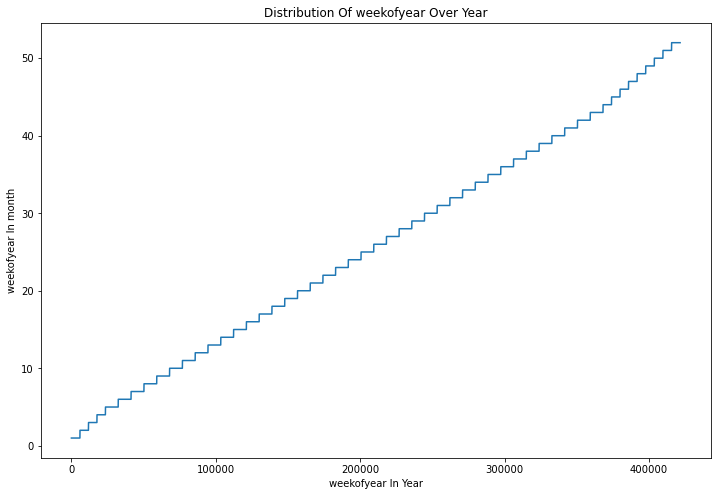

In [43]:
subset = data_sin_cos.copy() # over all data

m_d = subset['weekofyear'].sort_values(ignore_index=True).plot(figsize=(12,8),kind='line')

m_d.set_title("Distribution Of weekofyear Over Year")
m_d.set_ylabel("weekofyear In month")
m_d.set_xlabel("weekofyear In Year")

def is_continuous(lst):
    return any((pred+1 != nxt and pred!= nxt) for pred,nxt in zip(lst,lst[1:]))

print('False' if is_continuous(subset['weekofyear'].sort_values(ignore_index=True).tolist()) else 'weekofyear is continuous')

Text(0.5, 0, 'Sine Encoded Months')

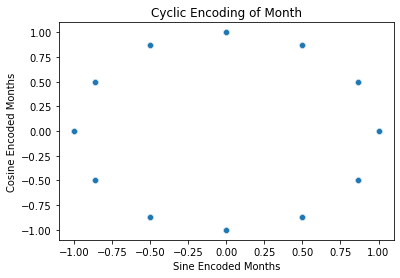

In [44]:
c_m = sns.scatterplot(x="month_sin",y="month_cos",data=data_sin_cos)

c_m.set_title("Cyclic Encoding of Month")
c_m.set_ylabel("Cosine Encoded Months")
c_m.set_xlabel("Sine Encoded Months")

Type

In [45]:
df_type = df['Type'].astype('category')
df_type

0         A
1         B
2         C
3         B
4         A
         ..
421565    A
421566    A
421567    A
421568    B
421569    A
Name: Type, Length: 421570, dtype: category
Categories (3, object): ['A', 'B', 'C']

Text(0.5, 0, 'TYPE')

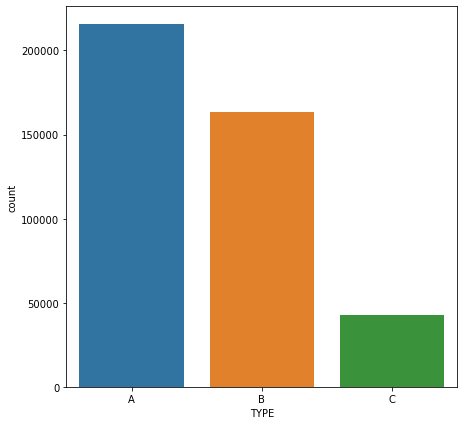

In [55]:
fig,ax = plt.subplots(1,1,figsize=(7,7))

sns.countplot(data=df,x='Type',ax=ax)

fig.patch.set_facecolor('white')
ax.set_xlabel('TYPE')

In [29]:
# 범주형 타입을 숫자로 인코딩
ordinal_ecd = OrdinalEncoder(dtype='int64')

encoded = ordinal_ecd.fit_transform(df['Type'].to_numpy().reshape(-1,1))
df.loc[:,'Type'] = encoded
df['Type']

0         0
1         1
2         2
3         1
4         0
         ..
421565    0
421566    0
421567    0
421568    1
421569    0
Name: Type, Length: 421570, dtype: int64